Business Problem:
Detecting sarcasm is crucial for accurate sentiment analysis in various fields, including customer feedback, public relations, brand management, social media monitoring, and ad campaign analysis. Misinterpreting sarcastic comments can lead to flawed insights and responses, adversely affecting businesses. This project aims to develop a model capable of accurately identifying and understanding sarcasm in textual data to improve sentiment analysis and decision-making processes.


Data Loading and Cleaning: The dataset was loaded from kaggle_train.csv, and missing values in the 'comment' column were filled with empty strings to ensure data integrity. To manage computational resources efficiently, a sample of 10,000 records was selected from the dataset.

Label Encoding: Categorical labels (sarcastic or non-sarcastic) were converted into numerical values (0 and 1) using LabelEncoder, making them suitable for machine learning models.

Text Vectorization: The TF-IDF vectorizer was employed with a maximum of 5,000 features to transform the text data into numerical features. This method balances the importance of frequent and rare words, providing a meaningful representation of the text data.

Train-Test Split: The dataset was divided into training and testing sets using an 80-20 split. This ensures that the model is trained on a substantial portion of the data while being evaluated on unseen data to assess its generalization performance.

Model Building: A Convolutional Neural Network (CNN) was constructed using a Sequential model. The architecture included Conv1D layers with ReLU activation to capture local patterns in the text, a GlobalMaxPooling1D layer to reduce dimensionality, and dense layers with dropout for regularization and batch normalization for stability. The final layer was a sigmoid output layer for binary classification.

Model Training and Evaluation: The model was trained with early stopping to prevent overfitting and a learning rate scheduler to adjust the learning rate during training. The performance of the model was evaluated on the test set by calculating the F1 score and accuracy. Additionally, a classification report and confusion matrix were generated to provide detailed insights into the model's performance.

Importinf Necessary Libraries and Loading the dataset and Splitting it

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('kaggle_train.csv')

# Handle missing values in the 'comment' column
data['comment'].fillna('', inplace=True)

# Reduce dataset size for memory efficiency (sample 10,000 records)
data = data.sample(n=10000, random_state=42)

# Encode target labels if necessary
label_column = 'label'
label_encoder = LabelEncoder()
data[label_column] = label_encoder.fit_transform(data[label_column])

# Text Vectorization using TF-IDF with fewer features
tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(data['comment']).toarray()

# Split data into features and target
y = data[label_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




First few rows of the dataset:
   label                                            comment
0      0                                         NC and NH.
1      0  You do know west teams play against west teams...
2      0  They were underdogs earlier today, but since G...
3      0  This meme isn't funny none of the "new york ni...
4      0                    I could use one of those tools.

Basic Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909293 entries, 0 to 909292
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   label    909293 non-null  int64 
 1   comment  909293 non-null  object
dtypes: int64(1), object(1)
memory usage: 13.9+ MB
None

Summary statistics for the dataset:
               label
count  909293.000000
mean        0.500383
std         0.500000
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000

Distribution of the target

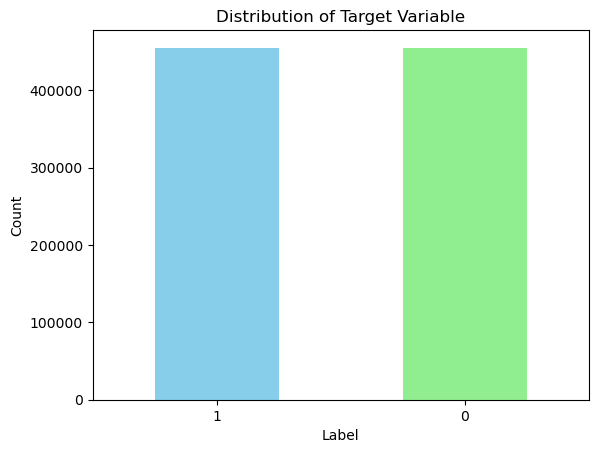

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('kaggle_train.csv')

# Handle missing values in the 'comment' column
data['comment'].fillna('', inplace=True)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nBasic Information about the dataset:")
print(data.info())

# Display summary statistics for the dataset
print("\nSummary statistics for the dataset:")
print(data.describe())

# Display the distribution of the target variable
print("\nDistribution of the target variable:")
print(data['label'].value_counts())

# Plot the distribution of the target variable
data['label'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Building the Layers

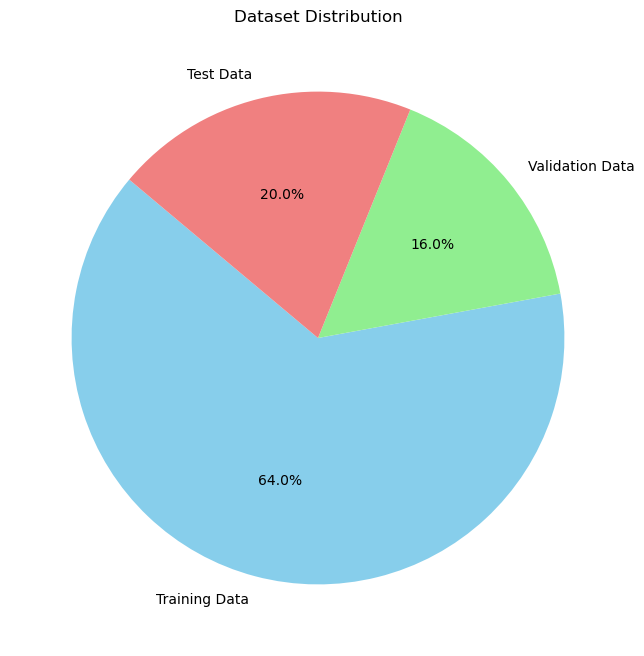

In [8]:
import matplotlib.pyplot as plt

# Sizes of the datasets
train_size = len(X_train)
test_size = len(X_test)
validation_size = int(0.2 * train_size)  # Since validation split is 0.2 of the training data

# Sizes for the pie chart
sizes = [train_size - validation_size, validation_size, test_size]
labels = ['Training Data', 'Validation Data', 'Test Data']
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Dataset Distribution')
plt.show()


In [3]:
# Define the CNN model
def build_cnn_model():
    model = Sequential()
    
    # Input layer
    model.add(Input(shape=(X_train.shape[1], 1)))
    
    # Conv1D layer
    model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
    
    # Flatten layer
    model.add(Flatten())
    
    # Dense layers with dropout and batch normalization
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Build the model with the specified configuration
model_cnn = build_cnn_model()

# Define early stopping and learning rate scheduler
early_stopping_cnn = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

def scheduler_cnn(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * np.exp(-0.1))

lr_scheduler_cnn = LearningRateScheduler(scheduler_cnn)

# Reshape the data for CNN input
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the CNN model
history_cnn = model_cnn.fit(
    X_train_cnn, y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping_cnn, lr_scheduler_cnn]
)

# Predict on the test set for CNN model
y_pred_cnn = (model_cnn.predict(X_test_cnn) > 0.5).astype("int32")

# Calculate the F1 score and accuracy for CNN model
f1_cnn = f1_score(y_test, y_pred_cnn)
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"CNN F1 Score: {f1_cnn}")
print(f"CNN Accuracy: {accuracy_cnn}")

# Function to preprocess and predict new input for CNN model
def preprocess_and_predict_cnn(comment):
    # Preprocess the input comment
    input_vector = tfidf.transform([comment]).toarray()
    input_vector = input_vector.reshape(input_vector.shape[0], input_vector.shape[1], 1)
    
    # Make prediction
    prediction = (model_cnn.predict(input_vector) > 0.5).astype("int32")
    return prediction



Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.5332 - loss: 0.7820 - val_accuracy: 0.5319 - val_loss: 0.6781 - learning_rate: 0.0010
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.6416 - loss: 0.6276 - val_accuracy: 0.5931 - val_loss: 0.6541 - learning_rate: 0.0010
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.7038 - loss: 0.5702 - val_accuracy: 0.6175 - val_loss: 0.6693 - learning_rate: 0.0010
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7331 - loss: 0.5350 - val_accuracy: 0.6269 - val_loss: 0.6979 - learning_rate: 0.0010
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7530 - loss: 0.5136 - val_accuracy: 0.6175 - val_loss: 0.7391 - learning_rate: 0.0010
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.7838 - loss: 0.4694 - val_accuracy: 0.6206 - val_loss: 0.7403 - learning_rate: 0.0010
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7963 - loss: 0

Input Layer: Specifies the shape of the input data with (X_train.shape[1], 1) to handle text data transformed into numerical features.
Conv1D Layer: Uses 64 filters and a kernel size of 5 with ReLU activation to capture local patterns in the input text data.
GlobalMaxPooling1D Layer: Reduces dimensionality by taking the maximum value from each feature map, preserving the most significant features.
First Dense Layer: Contains 128 units with ReLU activation to process and learn higher-level features from the pooled data.
First Dropout Layer: Applies a 50% dropout rate to prevent overfitting by randomly setting half of the input units to 0 during training.
First BatchNormalization Layer: Normalizes the output of the previous layer to improve training speed and stability.
Second Dense Layer: Has 64 units with ReLU activation for further feature learning and abstraction.
Second Dropout Layer: Adds another 50% dropout rate to further prevent overfitting and enhance model generalization.
Second BatchNormalization Layer: Again normalizes the layer output to maintain stability and efficient training.
Output Layer: A single unit with sigmoid activation to produce a probability score for binary classification, determining if a comment is sarcastic or not.

In [4]:
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 996, 64)             │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 63744)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       4,079,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,247,301 (46.72 MB)

 Trainable params: 4,082,369 (15.57 MB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 8,164,740 (31.15 MB)

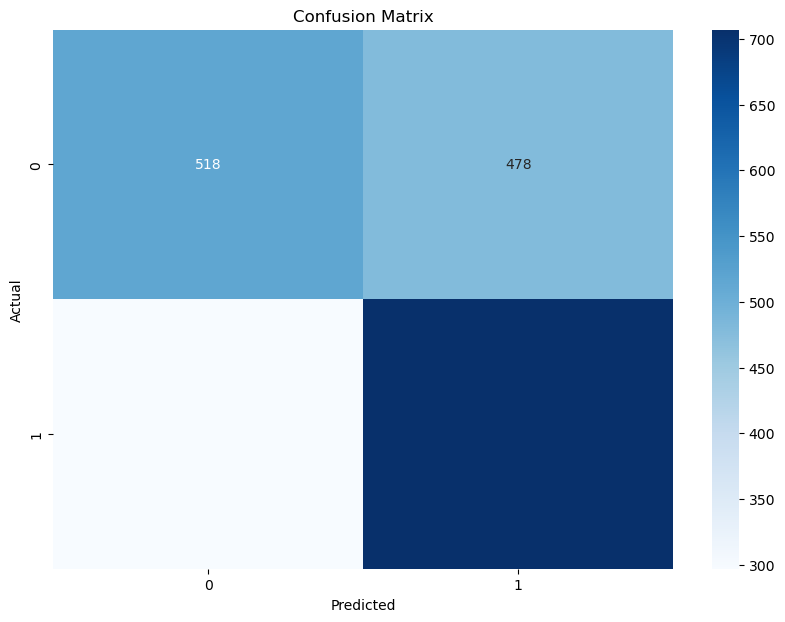

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_cnn)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


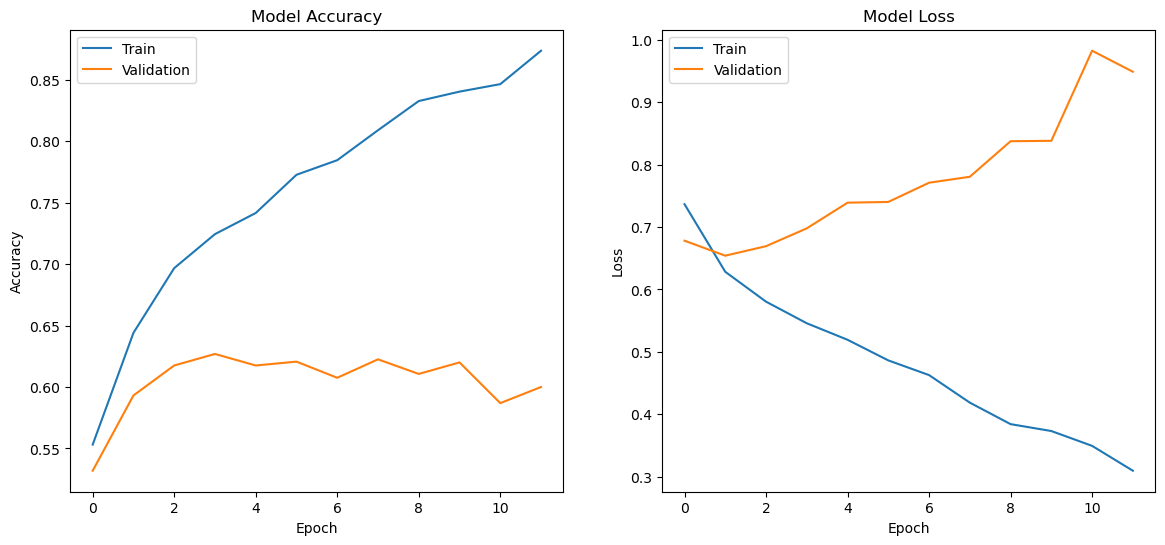

In [9]:
import matplotlib.pyplot as plt

# Assuming `history_cnn` is the history object returned by the model's fit method

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [6]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred_cnn)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.52      0.57       996
           1       0.60      0.70      0.65      1004

    accuracy                           0.61      2000
   macro avg       0.62      0.61      0.61      2000
weighted avg       0.62      0.61      0.61      2000



Class 0 (Non-Sarcastic):

Precision: 0.64
Explanation: Out of all the predictions made for the non-sarcastic class, 64% were correctly identified as non-sarcastic.
Recall: 0.52
Explanation: Out of all the actual non-sarcastic instances, 52% were correctly identified by the model.
F1-Score: 0.57
Explanation: The harmonic mean of precision and recall, providing a balance between the two metrics.
Support: 996
Explanation: The total number of actual instances of the non-sarcastic class in the dataset.
Class 1 (Sarcastic):

Precision: 0.60
Explanation: Out of all the predictions made for the sarcastic class, 60% were correctly identified as sarcastic.
Recall: 0.70
Explanation: Out of all the actual sarcastic instances, 70% were correctly identified by the model.
F1-Score: 0.65
Explanation: The harmonic mean of precision and recall, providing a balance between the two metrics.
Support: 1004
Explanation: The total number of actual instances of the sarcastic class in the dataset.
Overall Metrics:

Accuracy: 0.61
Explanation: The overall accuracy of the model, indicating that 61% of the total predictions were correct.
Macro Average:
Precision: 0.62
Explanation: The average precision across both classes, treating each class equally.
Recall: 0.61
Explanation: The average recall across both classes, treating each class equally.
F1-Score: 0.61
Explanation: The average F1-score across both classes, treating each class equally.
Weighted Average:
Precision: 0.62
Explanation: The average precision across both classes, weighted by the number of instances in each class.
Recall: 0.61
Explanation: The average recall across both classes, weighted by the number of instances in each class.
F1-Score: 0.61
Explanation: The average F1-score across both classes, weighted by the number of instances in each class.

In [5]:
# Function to determine if a comment is sarcastic or not
def is_sarcastic(comment):
    prediction = preprocess_and_predict_cnn(comment)
    if prediction[0][0] == 1:
        return "Sarcastic"
    else:
        return "Not Sarcastic"

# Example usage for new input with CNN model
new_comment_cnn = "This is a sample comment for prediction."
prediction_cnn = is_sarcastic(new_comment_cnn)
print(f"Prediction for new comment with CNN model: {prediction_cnn}")

# Interactive input for user to check if a comment is sarcastic
while True:
    user_input = input("Enter a comment to check if it is sarcastic or 'exit' to quit: ")
    if user_input.lower() == 'exit':
        break
    print(f"Prediction: {is_sarcastic(user_input)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction for new comment with CNN model: Not Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  I am batman.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Prediction: Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  Why is it raining cats and dogs?


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Not Sarcastic


Enter a comment to check if it is sarcastic or 'exit' to quit:  exit
